In [102]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
from scipy import stats

In [103]:

missing = [' ']
eurusdH4 = pd.read_csv("EuroGBP_H1.csv", na_values = missing)
eurusdH4.dropna(inplace = True) 
print(eurusdH4.shape)
mean = eurusdH4['Mean']
low = eurusdH4['Low']
high = eurusdH4['High']

(19666, 20)


In [104]:
X = eurusdH4.values[:,3:16]

In [105]:
X[1][0]

0.89097

In [106]:
# lowX_train, lowX_test, lowy_train, lowy_test = train_test_split(
#     X, low, test_size=0.1, random_state=0)

In [107]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, low)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
lowY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((low-lowY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((low-Y_bar)**2)
MSE = (sum((low - lowY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


RSS : 69651037.47020699
MSE : 3544.2213245576527
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -83021.6363       14.595    -5688.539    0.000
1               Open   68540.9091      433.998      157.929    0.000
2                 Ma    5056.0801  1034684.637        0.005    0.996
3                Rsi      -0.3596        0.117       -3.061    0.002
4                CCI      -0.0259        0.007       -3.455    0.001
5                adx      -0.0387        0.046       -0.835    0.404
6               Macd   21405.9133      871.420       24.564    0.000
7                atr  -41240.5228      930.172      -44.336    0.000
8            Chaiken       0.0000        0.000        2.317    0.021
9            HighLow      -0.0003        0.000       -8.180    0.000
10          Aligator    5056.0747  1034689.973        0.005    0.996
11                AC   18169.4740      586.299       30.990    0.000
12                AD       0.0000        0.000        

In [108]:
lowData = []
lowData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
lowData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
lowData['Actual Low'] = low
lowData['Predicted Low'] = lowY_hat
lowData.to_csv('low data prediction.csv',index=False)

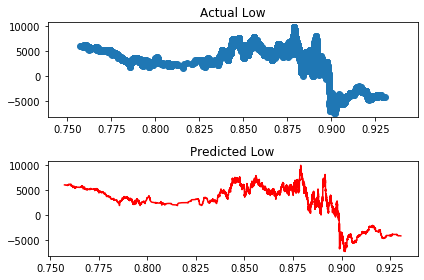

In [109]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,low)
ax1.set_title('Actual Low')
ax2.plot(np.sort(XX) ,lowY_hat ,color='red');
ax2.set_title('Predicted Low')

plt.tight_layout()
# plt.show()

In [110]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, high)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
highY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((high-highY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((high - Y_bar)**2)
MSE = (sum((high - highY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 108569917.38553791
MSE : 5524.624332665271
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -82992.4835       18.220    -4555.007    0.000
1               Open   71013.9002      541.828      131.064    0.000
2                 Ma   -5628.5713  1297035.907       -0.004    0.997
3                Rsi       1.4227        0.147        9.698    0.000
4                CCI      -0.1805        0.009      -19.282    0.000
5                adx       0.0853        0.058        1.475    0.140
6               Macd  -19129.1379     1087.955      -17.583    0.000
7                atr   22818.7317     1161.289       19.649    0.000
8            Chaiken      -0.0000        0.000       -7.318    0.000
9            HighLow       0.0000        0.000        0.920    0.357
10          Aligator   -5628.5665  1297038.796       -0.004    0.997
11                AC   -1772.6546      732.020       -2.422    0.015
12                AD      -0.0000        0.000       -

In [111]:
highData = []
highData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
highData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
highData['Actual High'] = high
highData['Predicted High'] = highY_hat
highData.to_csv('High data prediction.csv',index=False)

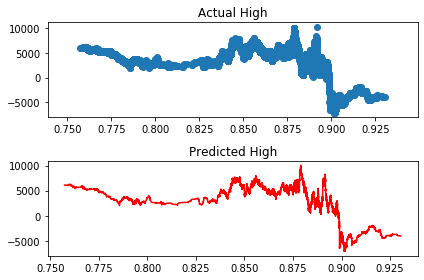

In [112]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,high)
ax1.set_title('Actual High')
ax2.plot(np.sort(XX) ,highY_hat ,color='red');
ax2.set_title('Predicted High')

plt.tight_layout()
plt.show()

In [113]:
# meanX_train, meanX_test, meany_train, meany_test = train_test_split(
#     X, mean, test_size=0.1, random_state=0)

In [114]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, mean)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
meanY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((mean-meanY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((mean-Y_bar)**2)
MSE = (sum((mean - meanY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 39540330.58671963
MSE : 2012.0257778709358
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83007.0599      10.995    -7549.397    0.000
1               Open   69777.4047     326.985      213.396    0.000
2                 Ma    -286.2456   78330.171       -0.004    0.997
3                Rsi       0.5315       0.089        6.004    0.000
4                CCI      -0.1032       0.006      -18.269    0.000
5                adx       0.0233       0.035        0.668    0.504
6               Macd    1138.3877     656.489        1.734    0.083
7                atr   -9210.8956     700.762      -13.144    0.000
8            Chaiken      -0.0000       0.000       -4.526    0.000
9            HighLow      -0.0001       0.000       -4.666    0.000
10          Aligator    -286.2459   78332.392       -0.004    0.997
11                AC    8198.4097     441.771       18.558    0.000
12                AD      -0.0000       0.000       -1.987    0.047

In [115]:
meanData = []
meanData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
meanData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
meanData['Actual Mean'] = mean
meanData['Predicted Mean'] = meanY_hat
meanData.to_csv('Mean data prediction.csv',index=False)

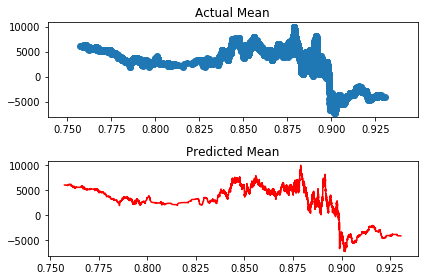

In [116]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,mean)
ax1.set_title('Actual Mean')
ax2.plot(np.sort(XX) ,meanY_hat ,color='red');
ax2.set_title('Predicted Mean')

plt.tight_layout()
plt.show()

In [117]:

print(len(meanY_hat), len(low))

gg = np.sum(meanY_hat >= low)
print(gg)

19666 19666
19018


In [118]:
gg1 = np.sum(meanY_hat <= high)
print(gg1)

18942


In [119]:
gg1 = np.sum(highY_hat <= low)
print(gg1)

33


In [120]:
gg1 = np.sum(lowY_hat >= high)
print(gg1)

15


In [121]:
highg = np.sum(highY_hat >=high)
print(highg)

12372


In [122]:
lowg = np.sum(lowY_hat < low)
print(lowg)

12218


In [123]:
print(meanY_hat)

[ 6084.58301635  6088.63225     6101.34192402 ... -4051.45523684
 -4044.54990901 -4085.84650662]


In [124]:
666-18


648

In [95]:
18294/19666

0.9302349232177362

In [93]:
19666-1372

18294